# Demo for burts detections

This notebook aims to generate a signal with known beta busts components and to apply the Time-Frequency events (TFE) detection method.


# Definitions


In [1]:
# -------------------------------
# Define path
Ruta            = "/content/drive/My Drive/00_JMAO/11_PROJECTS/Project_BetaBurst/Code/"


# Import libraries

In [2]:
# -------------------------------
# Install hmmlearn
%%capture
! pip install hmmlearn


In [3]:
# -------------------------------
# Install mne
%%capture
! pip install mne


In [4]:
# -------------------------------
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# -------------------------------
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# Insert the directory
import sys
sys.path.insert(0,Ruta)

# -------------------------------
# Import custom made functions
import ToolboxBurstsDetection as TBD


Mounted at /content/drive


# Generate signal

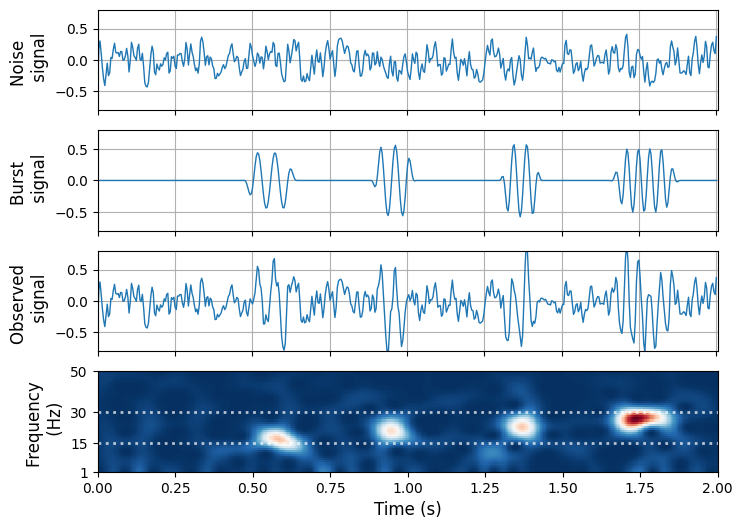

In [34]:
# -------------------------------
# Generate a signal with burts components
fs                = 256
SignalDuration    = 2.0

xraw, t, _, _, _, _, _, _ = TBD.GenerateSignalWithBurstsV1(fs, SignalDuration, True )


In [35]:
# -------------------------------
# Print signal information
print( "Data type:",type(xraw) )
print( xraw.shape )


Data type: <class 'numpy.ndarray'>
(512,)


# Time-Frequency Events (TFE) method

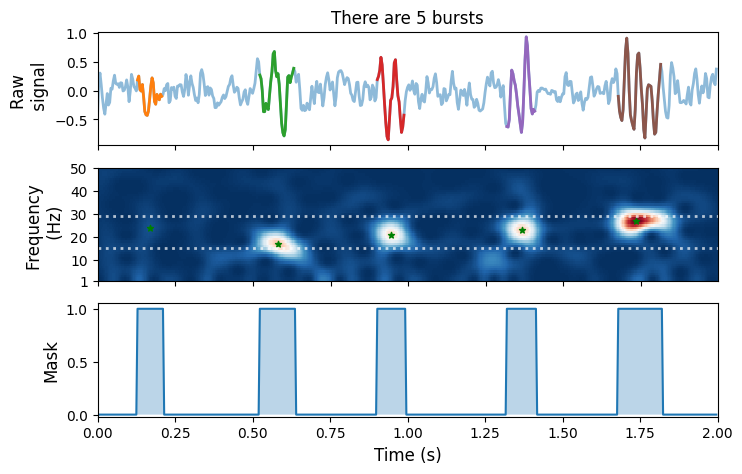

In [36]:
# -------------------------------
# Define frequency band
FrequencyBand   = [15, 29]  # Hz

# -------------------------------
# Set parameters

# Factor-of-the-median threshold
THRFOM         = 2

# Minimum bursts/segment duration (i.e., eliminate segments with duration lower than this)
MinSegDur      = 50 # ms

# Fequency values (Hz) over which to calculate the spectrogram
freqs          = np.array( range(1, 50 + 1) )

# -------------------------------
# Burst detection using the TFE method
maskTFE, InfoEventsTFE = TBD.BurstDetection_TFE(xraw, fs, FrequencyBand, THRFOM, MinSegDur, freqs, True )


There are:                5 bursts 
Burst rate:               2.5 burst/s 
 
Duration:                 [0.08203125, 0.11328125, 0.08984375, 0.09375, 0.140625] s
Peak amplitude:           [0.19240747628371474, 0.4491545357584431, 0.6016157367048087, 0.6538998896745869, 0.6465537238855095] u
 
Peak frequency:           [22.0, 19.0, 21.0, 23.0, 27.0] Hz
Peak frequency magnitude: [0.014942578314704011, 0.04484851157702303, 0.04992315101733338, 0.05173439098987205, 0.06769493351499299]
 


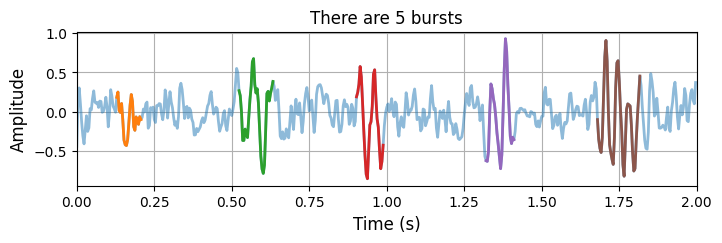

In [37]:
# -------------------------------
# Compute characteristics from mask
charsTFE, rateTFE, _, eventsTHE = TBD.ComputeBurstCharacteristicsFromMask(maskTFE, xraw, fs, FrequencyBand, True, True )
